# Random foerst
#### Advantages  
The Random Forests algorithm is one of the best among classification algorithms - able to classify large amounts of data with accuracy.  
1. make model more simple to interpret.
2. reduce the variance of the model, and therefore overfitting
3. handle missing data
4. handle large data with high dimentionality
5. reduce the computational cost (and time) of training a model. 

#### Disadvantages:
1. good job at classification not as good as regression 
2. very little control on what model does    

# advantages of using a random forest over a decision tree
1. Reduction in overfitting: by averaging several trees, there is a significantly lower risk of overfitting.   
2. reduce the chance of stumbling across a classifier that doesn’t perform

In [14]:
import pandas as pd
def read_csv(path_name):
    df = pd.read_csv(path_name, index_col=False)
    return df

path_name= "after_fix_missing.csv" 
df= read_csv(path_name)    
df.tail()

,0,1,2,3,4,5,6,7,8,67,...,141,142,154,155,156,159,163,164,165,signup
168998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,...,0.0,0.0,0.0,0.0,6.0,7.0,0.0,0.0,1.0,0.0
168999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,0.0
169000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
169001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
169002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.12,...,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0


# balance data

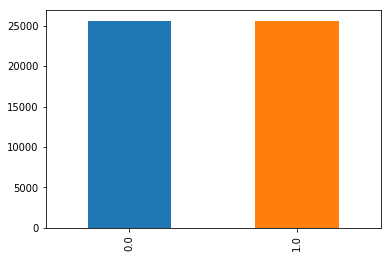

In [19]:
df['signup'].value_counts().plot(kind='bar')

In [20]:
def random_sample(df):
    #ramdon under sample not sign up
    df_sign_up= df[df['signup']==1]
    df_not_sign_up= df[df['signup']==0]

    num_sign_up= len(df_sign_up)
    df_not_sign_up= df_not_sign_up.sample(num_sign_up)
    #merge and random
    df= df_sign_up.append(df_not_sign_up)
    df= df.sample(len(df))

    print("num_sign_up: ", len(df_sign_up))
    print("num_not_sign_up: ", len(df_not_sign_up))
    
    return df

df= random_sample(df)
df.head()

num_sign_up:  25601
num_not_sign_up:  25601


,0,1,2,3,4,5,6,7,8,67,...,141,142,154,155,156,159,163,164,165,signup
8950,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
151518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96,...,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0
57846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.96,...,0.0,0.0,0.0,1.0,7.0,4.0,0.0,0.0,0.0,0.0
165809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
60213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.22,...,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0


In [4]:
def df2array(df):
    df_X= df.drop(['signup'], axis=1)
    x_label= df_X.columns.values.tolist()
    X= df_X.as_matrix()
    y= df['signup'].as_matrix()
    return X, x_label, y
X, x_label, y= df2array(df)   

print(x_label)
print(X)
print(y)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '67', '68', '69', '70', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '154', '155', '156', '159', '163', '164', '165']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[0. 1. 0. ... 0. 0. 1.]


/Users/hh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/Users/hh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [6]:
#split data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
def random_forest(X_train, X_test, n_estimators):
    #http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=-1)#10000
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test) #The Full Featured
    return accuracy_score(y_test, y_pred)

In [7]:
#tune parameter  
list_n_estimators=[2,3,4,5,10,15,20,30,50,100,200,300,500,1000]    
for n_estimators in list_n_estimators:
    print( n_estimators, "-", random_forest(X_train, X_test, n_estimators) )
    
print('done')

2 - 0.7259411161564376
3 - 0.7250134270787559
4 - 0.7337532347053366
5 - 0.7328743713685855
10 - 0.7381475513890924
15 - 0.7363409989746594
20 - 0.7395146721351497
30 - 0.7390264147258435
50 - 0.7389775889849128
100 - 0.7403447097309702
200 - 0.7407841413993458
300 - 0.7412235730677214
500 - 0.7416630047360969
1000 - 0.7413700502905132
done


# feature selection

In [12]:
def rank_feature(n_estimators, feature_threshold):
    clf = RandomForestClassifier(n_estimators=n_estimators, random_state=0, n_jobs=-1)#10000
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    print( "full feature accuracy: ", accuracy_score(y_test, y_pred) )
    
    r= list(clf.feature_importances_)
    rank= [ (r[i], x_label[i]) for i in range(len(r))]
    rank.sort(reverse=True)
    print("\n rank of feature: ")
    for rk in rank: print (rk)
    
    sfm = SelectFromModel(clf, threshold= feature_threshold)
    sfm.fit(X_train, y_train)
    print("selected feature: ",
          [ x_label[feature_list_index] for feature_list_index in sfm.get_support(indices=True)] )
    
    X_important_train = sfm.transform(X_train)
    X_important_test = sfm.transform(X_test) 
    
    return X_important_train, X_important_test

n_estimators= 500  #from tuning  
X_important_train, X_important_test= rank_feature(n_estimators, 0.02)  

full feature accuracy:  0.7416630047360969

 rank of feature: 
(0.20249315503351725, '103')
(0.11164166547379444, '67')
(0.11034677573012118, '88')
(0.08671644397579971, '156')
(0.07628891315663566, '102')
(0.06661120569540267, '85')
(0.04137820460743388, '87')
(0.0385954524318783, '84')
(0.03515666819214081, '136')
(0.03236651083484927, '101')
(0.028136676815664514, '155')
(0.027929424961967125, '68')
(0.018992591557735045, '165')
(0.018273507586454244, '159')
(0.014610086512891972, '83')
(0.012437552781102514, '86')
(0.0075054928547442, '91')
(0.0072233942972500555, '115')
(0.007191696928945792, '139')
(0.005951793378839585, '130')
(0.005626224315961443, '154')
(0.005594662239965631, '135')
(0.005529943002751883, '69')
(0.005418932345033237, '164')
(0.0024178149881668156, '2')
(0.0022665337902630506, '121')
(0.0021385491735842325, '90')
(0.002071991914468928, '94')
(0.0020654938309530705, '124')
(0.002055945751008667, '118')
(0.0017188627728431888, '106')
(0.0014236423381224653, '138

In [9]:
#tuning parameter
list_n_estimators=[2,3,4,5,10,15,20,30,50,100,200,300,500,1000]    
for n_estimators in list_n_estimators:
    print( n_estimators, "-", random_forest(X_important_train, X_important_test, n_estimators) )
    
print('done')

2 - 0.7255993359699233
3 - 0.7219862311410575
4 - 0.7300424783946097
5 - 0.7256969874517846
10 - 0.7349250524876715
15 - 0.7349250524876715
20 - 0.7379034226844392
30 - 0.740100581026317
50 - 0.7390752404667741
100 - 0.7375128167569943
200 - 0.7380010741663005
300 - 0.7383428543528148
500 - 0.7377569454616474
1000 - 0.7382452028709535
done


In [11]:
n_estimators= 30
print("selected feature ", random_forest(X_important_train, X_important_test, n_estimators) )

selected feature  0.740100581026317
